# Loan Application Status Prediction Project

## Dataset Description:
This dataset includes details of applicants who have applied for loan. The dataset also includes details like credit history, loan amount, their income, dependents etc. 

## Attributes Description:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases.
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions.
3.	Married - This refers to applicant being in a state of matrimony.
4.	Dependents - This refres to persons who depends on the applicants for survival.
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university.
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer.
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant.
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


## Objective:
The objective of this project is to predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. In this project, the prediction of applicant loan approval status involves the implementation of calssification model.

## Features and Target variable for Loan Application Status Prediction:

### Features: 
Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area

### Target variable:
Loan_Status

# Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, yeojohnson, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Support Vector Classifier
from sklearn.svm import SVC

# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble algorithms
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, 
BaggingClassifier)

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Saving and loading models
import joblib

# Importing Dataset

In [2]:
# Load data from CSV into DataFrame
df = pd.read_csv('Loan_Application_Status_Dataset.csv')

In [3]:
# Display first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Display last 5 rows of the dataframe
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis

In [5]:
# Display shape of the dataframe
df.shape

(614, 13)

Dataframe has 614 rows and 13 columns.

In [6]:
# Display the datatype of each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Columns such as 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area' and 'Loan_Status' have object datatype, column 'ApplicantIncome' has int datatype and columns 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History' have float datatype.

In [7]:
# Checking for if any whitespace,'?' 'NA' or '-' present in the dataset
df.isin([' ','NA','-','?']).sum().any()

False

No whitespace,'?' 'NA' or '-' present in the dataset.

In [8]:
# Checking for the duplicated rows in the dataset
df.duplicated().sum()

0

No duplicated rows present in the dataset.

In [9]:
# Checking for the number of unique values present inside each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Count of number of unique values present in the columns such as 'Loan_ID' and 'ApplicantIncome' is high, for the columns 'CoapplicantIncome' and 'LoanAmount' is relatively low and the columns such as 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area' and 'Loan_Status' display a low count of unique values.

'Credit_History' column has float datatype but it contains categorical data with 2 unique values (0.0 and 1.0). It is necessary to treat it as categorical column.

In [10]:
# Checking for the null values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Yes null values are present in the dataset.

In [11]:
# Calculating the percentage of missing data for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Creating a DataFrame to display the results
missing_data_info = pd.DataFrame({'Missing Values': df.isnull().sum(), '% Missing Data': missing_percentage})

# Sorting the missing data information in descending order by '% Missing Data'
missing_data_info = missing_data_info.sort_values(by = '% Missing Data', ascending = False)

# Display the sorted missing data information
print(missing_data_info)

                   Missing Values  % Missing Data
Credit_History                 50            8.14
Self_Employed                  32            5.21
LoanAmount                     22            3.58
Dependents                     15            2.44
Loan_Amount_Term               14            2.28
Gender                         13            2.12
Married                         3            0.49
Loan_ID                         0            0.00
Education                       0            0.00
ApplicantIncome                 0            0.00
CoapplicantIncome               0            0.00
Property_Area                   0            0.00
Loan_Status                     0            0.00


In 'Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender' and 'Married' columns, null values are present indicating missing data in the columns. Imputing them with mean, median or mode is a suitable option depending on the specific column and its datatype.

## Imputing Missing Values 

In [12]:
# Imputing columns containing null values with mean or mode
columns_to_impute = ['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for i in columns_to_impute:
    # Imputing missing values in columns containing categorical data with mode
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode().iloc[0], inplace=True)
    # Imputing missing values in columns containing numerical data with mean and for column 'Credit_History' with mode
    elif df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        if i == 'Credit_History':
            df[i].fillna(df[i].mode().iloc[0], inplace=True)
        else:
            df[i].fillna(df[i].mean(), inplace=True)

In [13]:
# Display the dataset after imputing the missing values
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [14]:
# Again checking for the null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, no null values present in the dataset.

In [15]:
# Separating numerical columns and categorical columns for further data analysis
categorical_columns = []
numerical_columns = []

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical_columns.append(i)
    elif df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        numerical_columns.append(i)

In [16]:
# Display the list of categorical columns
categorical_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [17]:
# Display the list of numerical columns
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [18]:
# Display the lengths of both the lists
print("No. of categorical columns:", len(categorical_columns))
print("No. of numerical columns:", len(numerical_columns))

No. of categorical columns: 8
No. of numerical columns: 5


In [19]:
# Display unique values present inside each categorical column
for i in categorical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

Loan_ID :
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

#### Loan_ID: 
Each entry is a unique identifier.

#### Gender: 
Two unique values: 'Male' and 'Female.'

#### Married: 
Two unique values: 'Yes' and 'No.'

#### Dependents:
Four unique values: '0,' '1,' '2,' and '3+.'

#### Education: 
Two unique values: 'Graduate' and 'Not Graduate.'

#### Self_Employed: 
Two unique values: 'Yes' and 'No.'

#### Property_Area: 
Three unique values: 'Urban,' 'Rural,' and 'Semiurban.'

#### Loan_Status: 
Two unique values: 'Y' (Yes) and 'N' (No).

In [20]:
# Display value count for each unique value present in the categoical column
for i in categorical_columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Y    422
N    192
Name: Loan_Status, dtype: int64




#### Loan_ID: 
There are a total of 614 unique loan IDs, with each loan ID having a count of 1.

#### Gender:
'Male': Count of 502 males.

'Female': Count of 112 females.

#### Married:
'Yes': Count of 401 married applicants.

'No': Count of 213 unmarried applicants.

#### Dependents:
'0': Count of 360 applicants with no dependents.

'1': Count of 102 applicants with 1 dependent.

'2': Count of 101 applicants with 2 dependents.

'3+': Count of 51 applicants with 3 or more dependents.

#### Education:
'Graduate': Count of 480 graduate applicants.

'Not Graduate': Count of 134 non-graduate applicants.

#### Self_Employed:
'No': Count of 532 applicants who are not self-employed.

'Yes': Count of 82 applicants who are self-employed.

#### Property_Area:
'Semiurban': Count of 233 applicants in semiurban areas.

'Urban': Count of 202 applicants in urban areas.

'Rural': Count of 179 applicants in rural areas.

#### Loan_Status:
'Y' (Yes): Count of 422 approved loan applications.

'N' (No): Count of 192 denied loan applications.

In [21]:
# Display unique values present inside each numerical column
for i in numerical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

ApplicantIncome :
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  2439  2237  8000  1820 51763  3522  5708  4344  3497  2045
  5516  6400  1916  4600 33846  3

#### ApplicantIncome: 
There are multiple unique values in the "ApplicantIncome" column.

#### CoapplicantIncome: 
There are nultiple unique values in the "CoapplicantIncome" column.

#### LoanAmount: 
There are multiple unique values in the "LoanAmount" column.

#### Loan_Amount_Term: 
There are 11 unique values in the "Loan_Amount_Term" column.

#### Credit_History: 
Two unique values: 0.0 and 1.0.

In [22]:
# Display value count for each unique value present in the numerical column
for i in numerical_columns:
    print(df[i].value_counts())
    print("\n")

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


1.0    525
0.0     89
Name: Credit_History, dtype: int64




#### ApplicantIncome: 
There are 505 unique values in the "ApplicantIncome" column.

#### CoapplicantIncome: 
There are 287 unique values in the "CoapplicantIncome" column.

#### LoanAmount: 
There are 203 unique values in the "LoanAmount" column.

#### Loan_Amount_Term: 
There are 11 unique values in the "Loan_Amount_Term" column. 

Most common: 360.0 months (512 occurrences).

Least common: 12.0 months (1 occurrence).

#### Credit_History: 
There are 2 unique values in the "Credit_History" column. 1.0 is more common (525 occurrences) and 0.0 is less common (89 occurrences).

In [23]:
# Display dataframe's details, such as columns' data type and no. of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
# Display summary statistics of the dataframe
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### ApplicantIncome:
The average applicant income is around 5403, indicating moderate income levels among applicants. However, there is significant income disparity, with some applicants earning as little as 150 and others as much as 81,000. This variation could impact their ability to qualify for loans.

#### CoapplicantIncome:
On average, coapplicants contribute approximately 1621 to the household income. Similar to applicant income, there is a wide variation in coapplicant income, with some having no coapplicants. Coapplicant income can affect the total household income, influencing loan eligibility.

#### LoanAmount:
The average loan amount requested is 146, with a standard deviation of approximately 84. This suggests that most applicants are requesting relatively small loans, but there is variation in loan amount preferences. Understanding this variation is crucial for assessing loan risk and eligibility.

#### Loan_Amount_Term:
The majority of loan applicants prefer a 360-month (30-year) loan term, as indicated by the 25th, 50th (median), and 75th percentiles. However, it's worth noting that some applicants opt for shorter or longer loan terms, which can affect monthly payments and eligibility.

#### Credit_History:
In the credit history column, with 1 indicating a good credit history and 0 indicating otherwise. Most applicants (at least 75%) have a good credit history. Having a good credit history is a positive factor for loan approval.

In [25]:
# Display summary statistics of the dataframe including categorical columns
df.describe(include = object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


#### Loan_ID:
There are 614 unique loan IDs, meaning each loan application is distinct. Loan IDs serve as unique identifiers for each loan application and do not provide any specific information about the applicants or their loans.

#### Gender:
There are two unique values, with "Male" being the most frequent (502 occurrences). The majority of applicants are male. Gender may be a factor influencing loan applications and approvals.

#### Married:
There are two unique values, with "Yes" being more frequent (401 occurrences). A significant portion of applicants are married (indicated by "Yes"). Marital status can be a factor affecting loan eligibility and decisions.

#### Dependents:
There are four unique values, with "0" being the most frequent (360 occurrences). The most common scenario is applicants having no dependents. The number of dependents can impact the financial responsibilities of the applicant and, in turn, loan eligibility.

#### Education:
There are two unique values, with "Graduate" being the most frequent (480 occurrences). The majority of applicants are graduates. Education level often plays a role in loan approvals and may influence income levels.

#### Self_Employed:

There are two unique values, with "No" being more frequent (532 occurrences). Most applicants are not self-employed. Self-employment status can affect loan eligibility due to variations in income stability.

#### Property_Area:
There are three unique values, with "Semiurban" being the most frequent (233 occurrences). A substantial number of applicants come from semiurban areas. Property location can be a factor in loan decisions due to differences in property values and local economic conditions.

#### Loan_Status:
There are two unique values, with "Y" (indicating "Yes") being more frequent (422 occurrences). A majority of loan applications have been approved ("Y"). Loan approval status is a critical outcome and depends on various factors, including those mentioned in the other columns.

# Data Visualization

In [26]:
sns.set(style = 'whitegrid')

## Univariate Analysis

### Count Plot

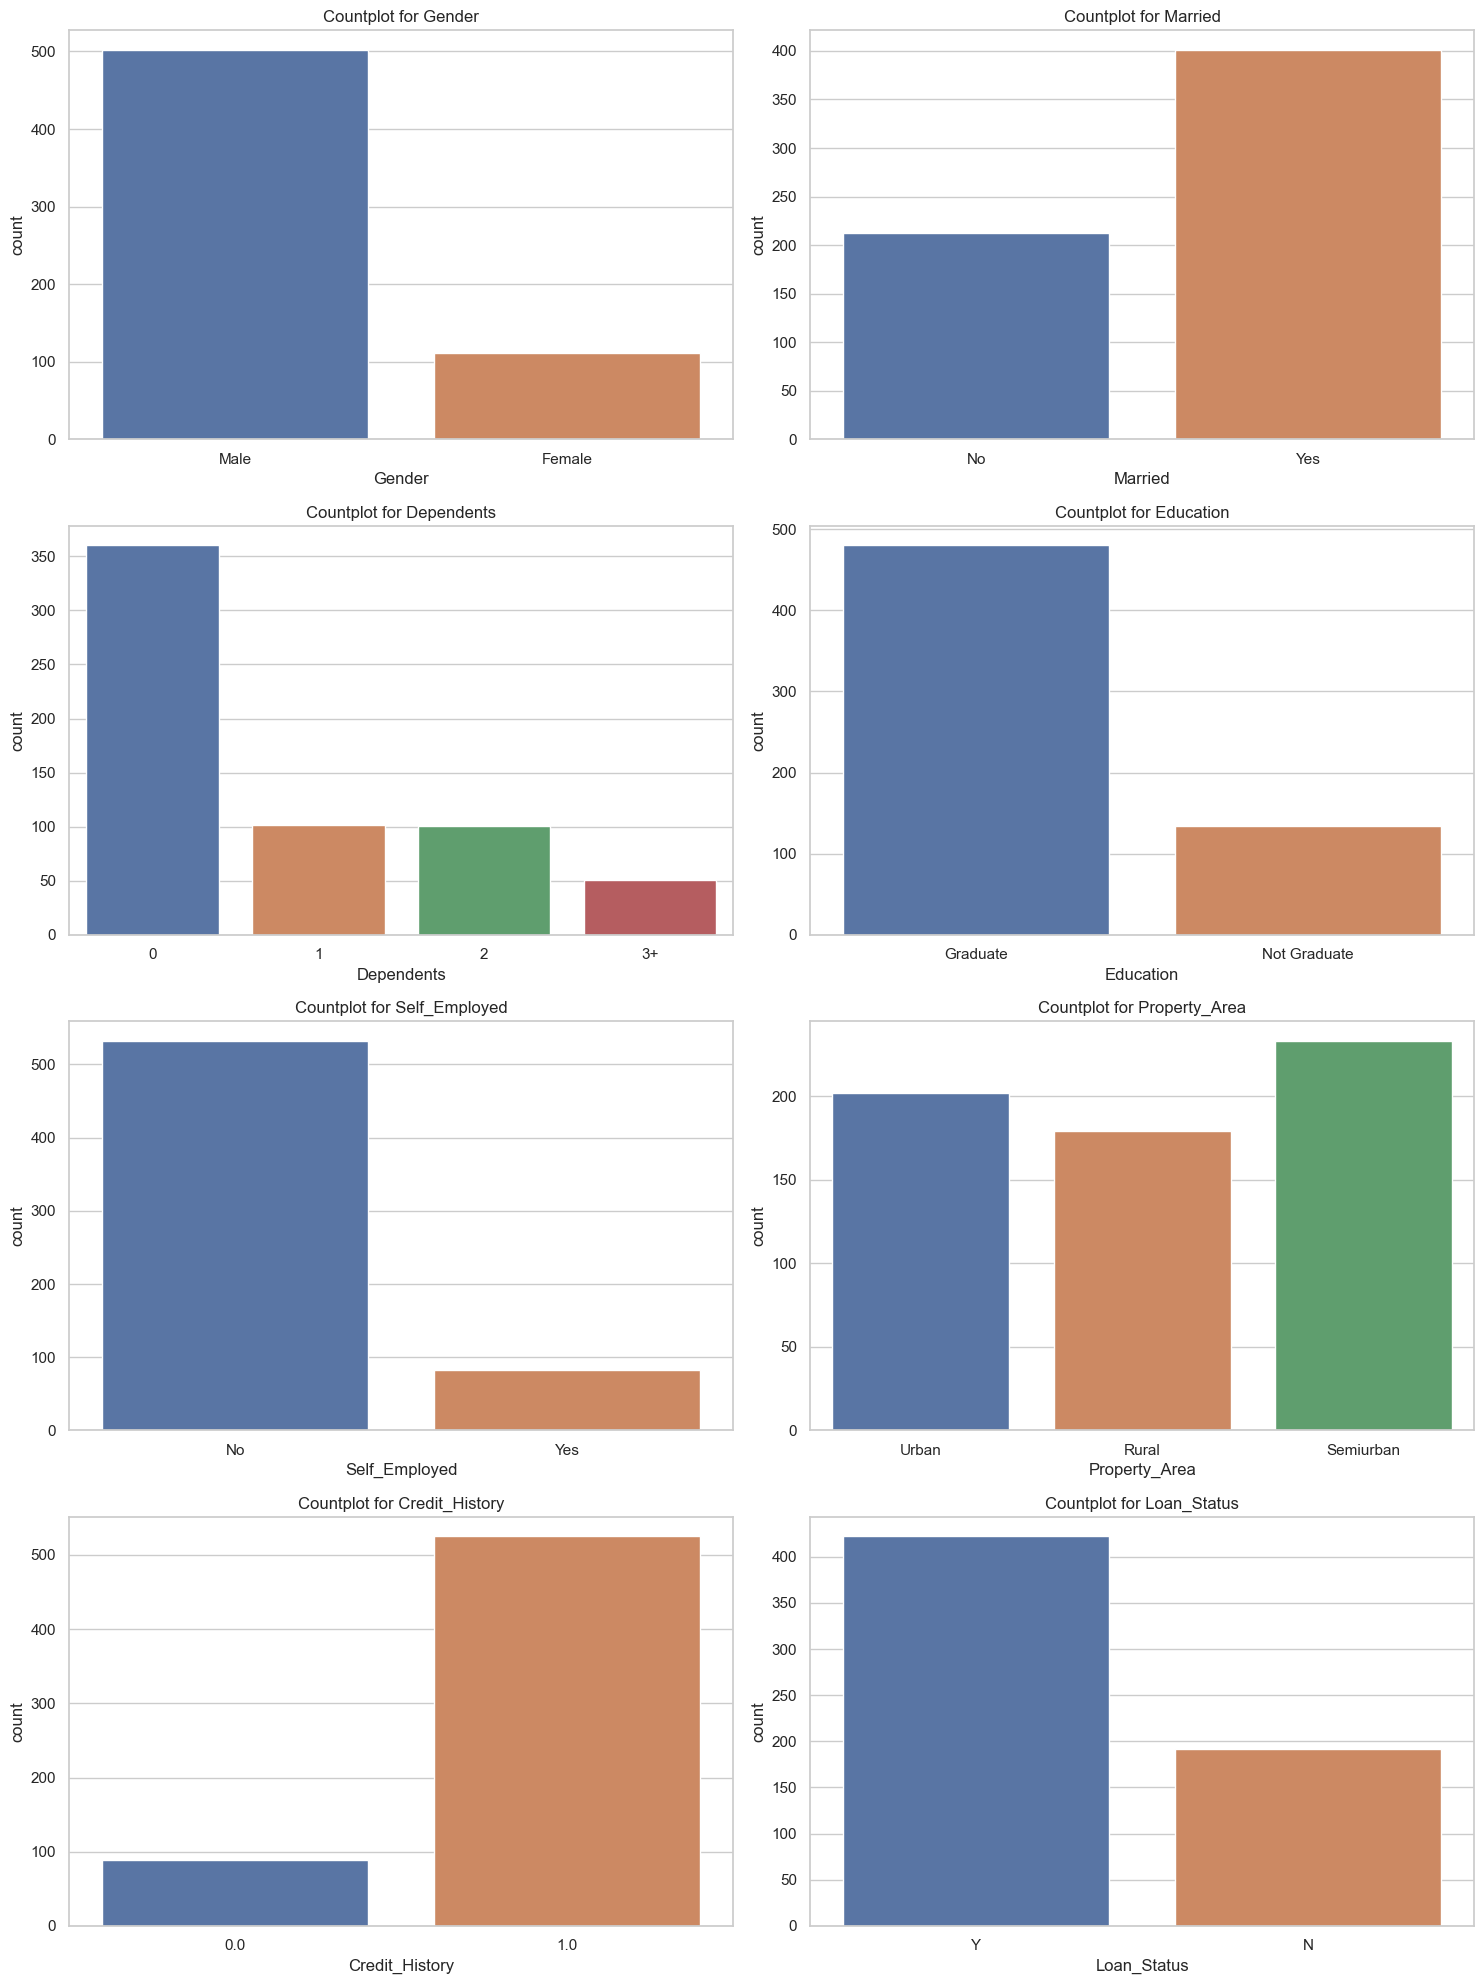

In [27]:
# Univariate analysis using Count plot for categorical columns
columns_to_plot = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History',
                   'Loan_Status']
rows = 4
columns = 2
plt.figure(figsize = (15, 20))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[columns_to_plot[i]]) 
    plt.title("Countplot for " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:

#### Gender
There are more males (502) than females (112) in the dataset.

#### Married
The majority of individuals in the dataset are married (401), while a significant number are not married (213).

#### Dependents
Most applicants have 0 dependents (360).
There is a relatively even distribution of applicants with 1 (102), 2 (101), and 3+ (51) dependents.

#### Education
A large proportion of applicants are graduates (480), while a smaller number are not graduates (134).

#### Self_Employed
The majority of applicants are not self-employed (532), while a smaller number are self-employed (82).

#### Property_Area
The dataset consists of applicants from three different property areas: Semiurban (233), Urban (202), and Rural (179).

#### Credit_History
1.0 is more common with 525 occurrences, and 0.0 is less common with 89 occurrences.

#### Loan_Status
The target variable shows that a higher number of applicants have been approved for loans (Y: 422) compared to those who have not been approved (N: 192).

### Pie Chart 

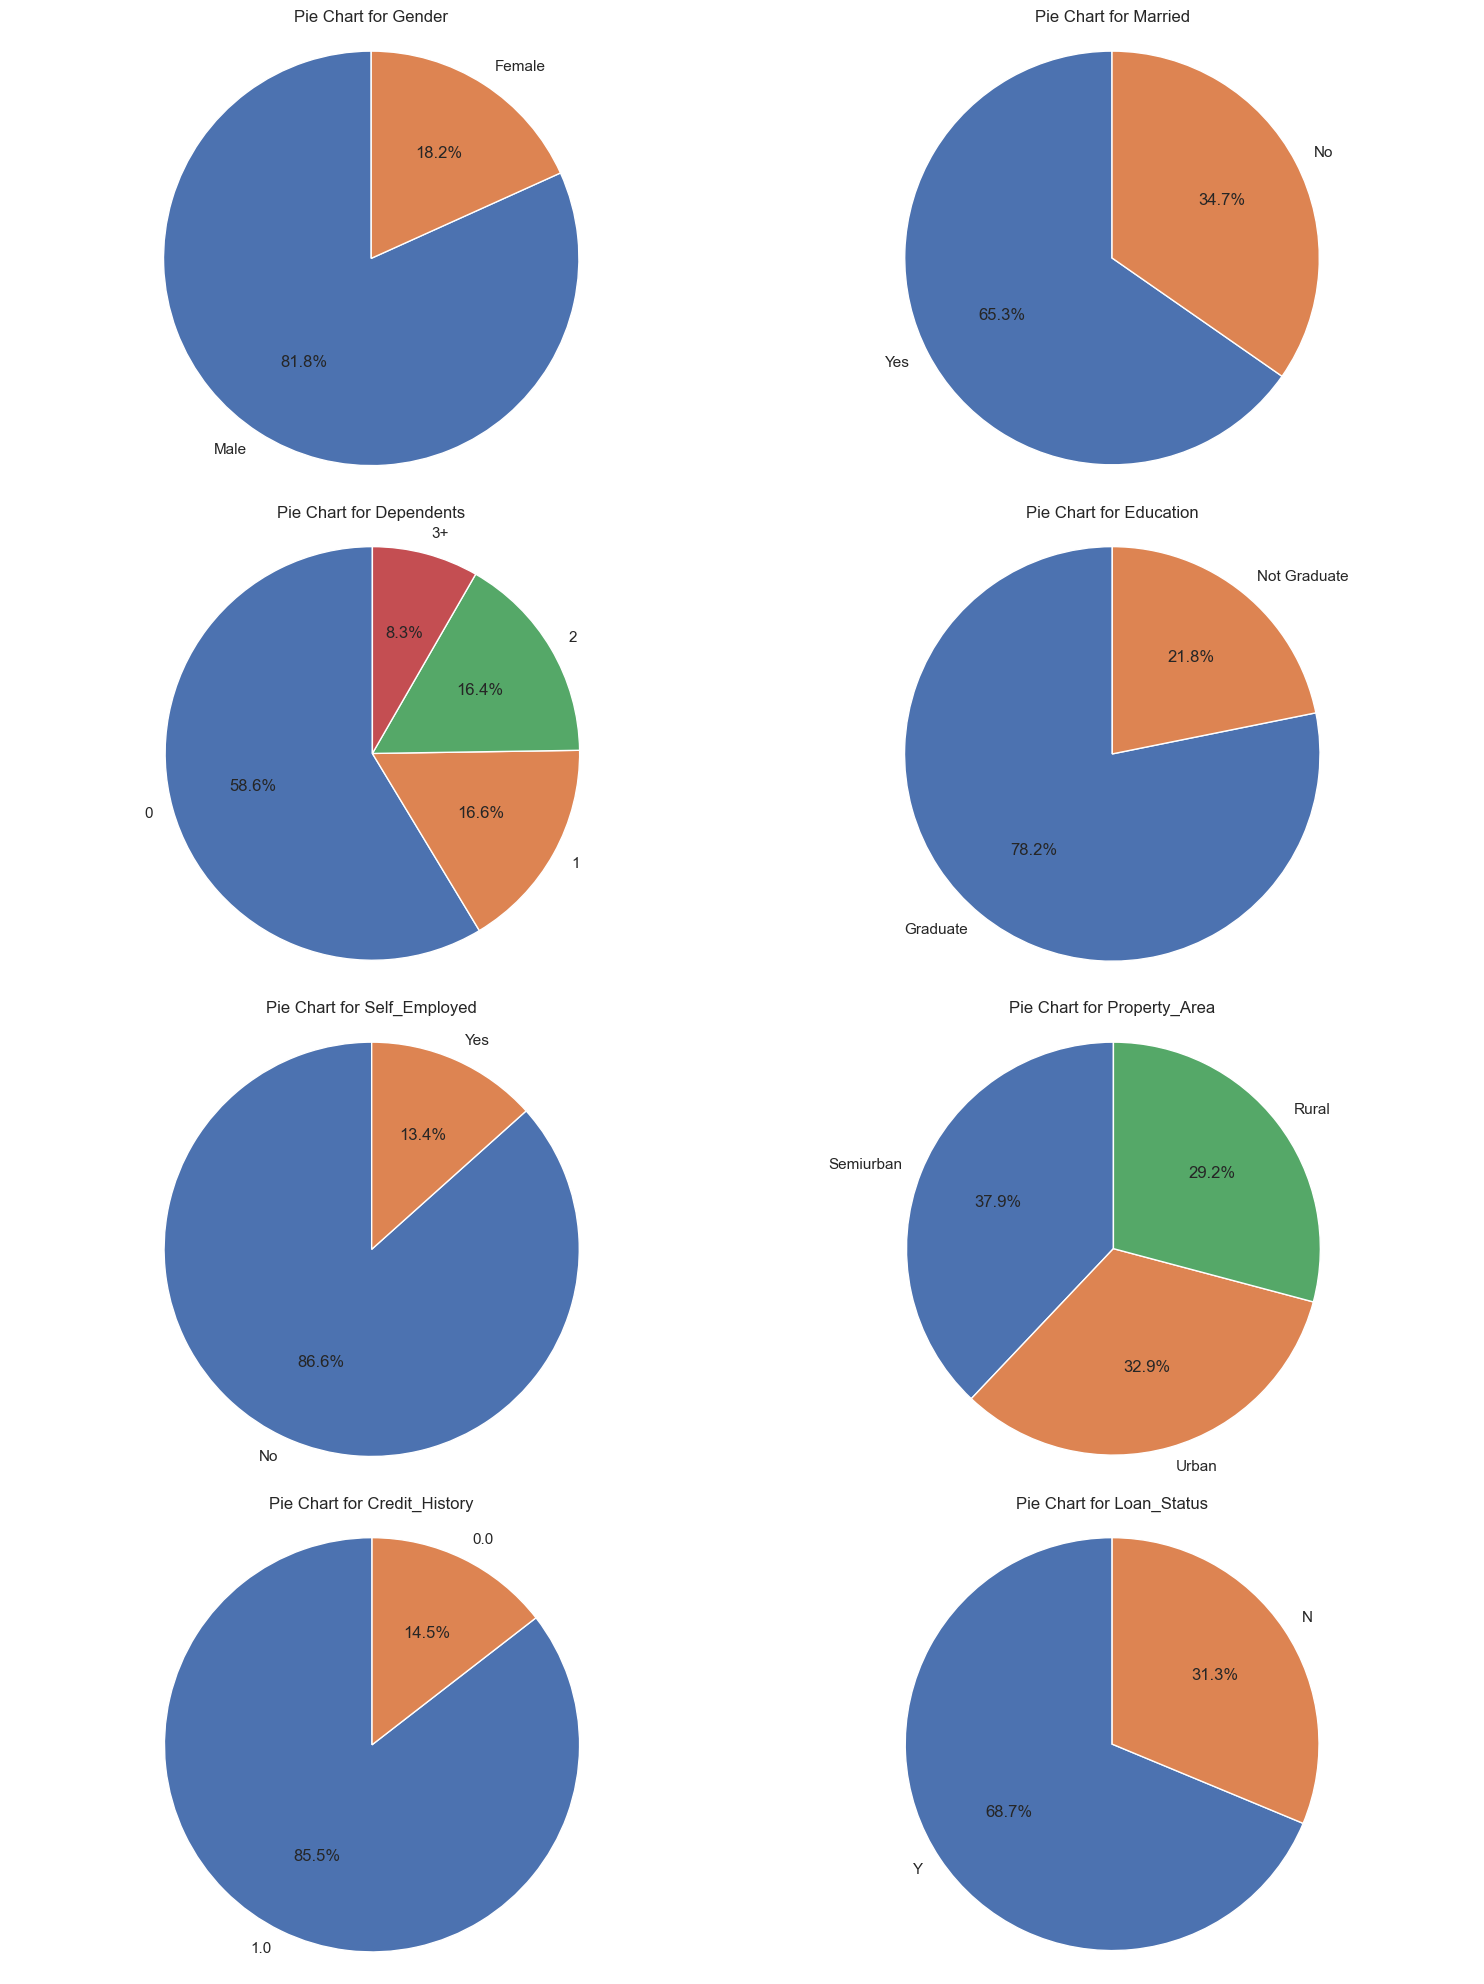

In [28]:
# Univariate analysis using Pie chart for categorical columns 
columns_to_plot = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History',
                   'Loan_Status']
rows = 4
columns = 2
plt.figure(figsize = (15, 20))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    category_counts = df[columns_to_plot[i]].value_counts()
    plt.pie(category_counts, labels = category_counts.index, autopct='%1.1f%%', startangle = 90)
    plt.title("Pie Chart for " + columns_to_plot[i])
    plt.axis('equal')
plt.tight_layout()
plt.show()

### Observations:
#### Gender
Approximately 81.8% of the dataset consists of males, while around 18.2% are females.

#### Married
In the dataset, approximately 65.3% of individuals are married, and about 34.7% are not married.

#### Dependents
The distribution of dependents is as follows: 58.8% of applicants have 0 dependents, 16.6% have 1 dependent, 16.5% have 2 dependents, and 8.1% have 3 or more dependents.

#### Education
Among the applicants, approximately 78.2% are graduates, and about 21.8% are not graduates.

#### Self_Employed
Approximately 86.6% of applicants are not self-employed, while around 13.4% are self-employed.

#### Property_Area
The distribution of applicants across property areas is as follows: 37.9% are from Semiurban areas, 32.9% are from Urban areas, and 29.2% are from Rural areas.

#### Credit_History
The majority of applicants (approximately 85.5%) have a positive credit history (1.0), while a smaller portion (approximately 14.5%) have a negative credit history (0.0).

#### Loan_Status
In terms of loan approval, approximately 68.7% of applicants have been approved for loans (Y), and around 31.3% have not been approved (N).

### Histogram

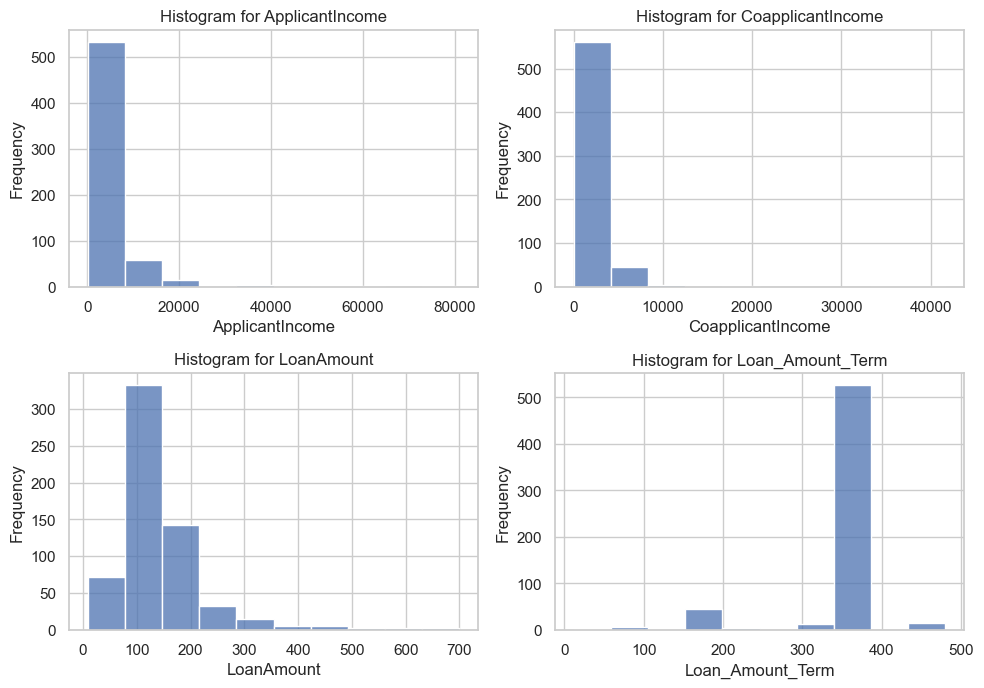

In [29]:
# Univariate analysis using Histogram for numerical columns
columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
rows = 3
columns = 2

plt.figure(figsize = (10, 10))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[columns_to_plot[i]], bins = 10) 
    plt.title("Histogram for " + columns_to_plot[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

### Observations:

#### ApplicantIncome
The distribution of applicant income varies widely, with some applicants having very low incomes and others having relatively high incomes. The histogram shows a right-skewed (positively skewed) distribution due to the presence of outliers with high incomes.

#### CoapplicantIncome
The coapplicant income data also varies, with many applicants having no coapplicants and others having varying levels of coapplicant income. The histogram shows a significant number of zero values (applicants without coapplicants) and a spread of values for those with coapplicants.

#### LoanAmount
The loan amount requested by applicants varies, with some requesting relatively small loans and others requesting larger loans. The histogram shows a distribution that is somewhat skewed depending on the concentration of loan amounts around specific values.

#### Loan_Amount_Term
The loan amount term is usually expressed in months, and the data shows various term values. The histogram shows the frequency of different loan term values, helping to understand the distribution of loan terms.

## Bivariate Analysis

### Bar Plot

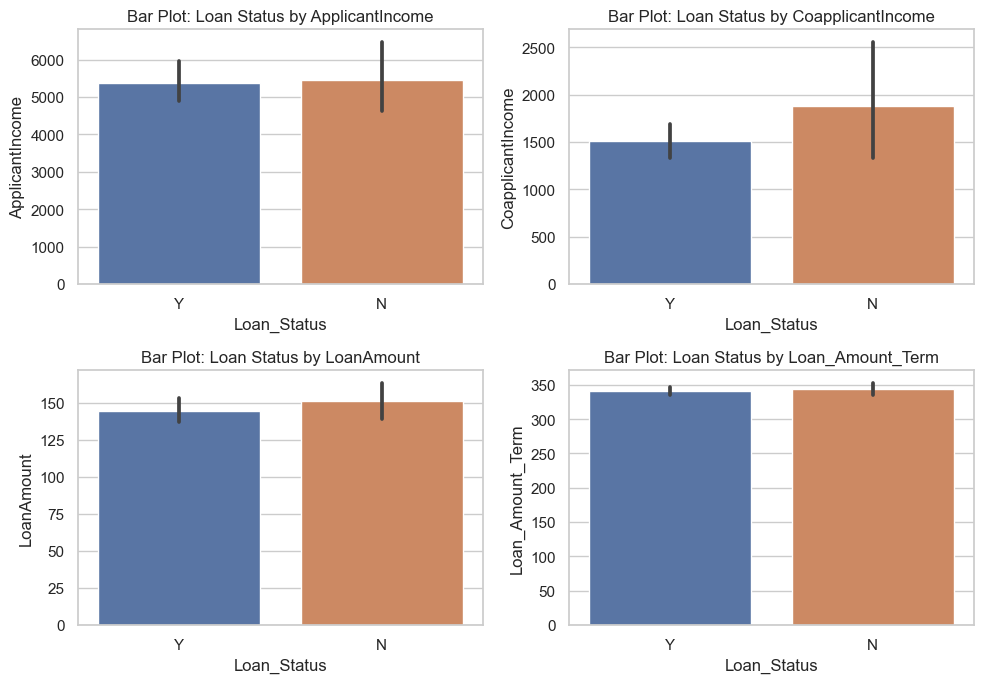

In [30]:
# Bivariate analysis using countplot
columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
rows = 2
columns = 2

plt.figure(figsize = (10, 7))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.barplot(x = 'Loan_Status', y = columns_to_plot[i], data = df)
    plt.title("Bar Plot: Loan Status by " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:
#### Loan_Status vs ApplicantIncome
The average ApplicantIncome is slightly higher for rejected loans (Loan_Status = N) compared to approved loans (Loan_Status = Y).

#### Loan_Status vs CoapplicantIncome
The average CoapplicantIncome is significantly lower for approved loans (Loan_Status = Y) compared to rejected loans (Loan_Status = N). Lower CoapplicantIncome seems to be associated with a higher likelihood of loan approval.

#### Loan_Status vs LoanAmount
On average, the LoanAmount is slightly lower for approved loans (Loan_Status = Y) compared to rejected loans (Loan_Status = N).
This suggests that loans with lower amounts may have a slightly higher chance of approval.

#### Loan_Status vs Loan_Amount_Term
The mean Loan_Amount_Term is similar for both approved and rejected loans.
Loan term duration doesn't appear to be a significant factor in loan approval decisions based on these averages.

### Count Plot

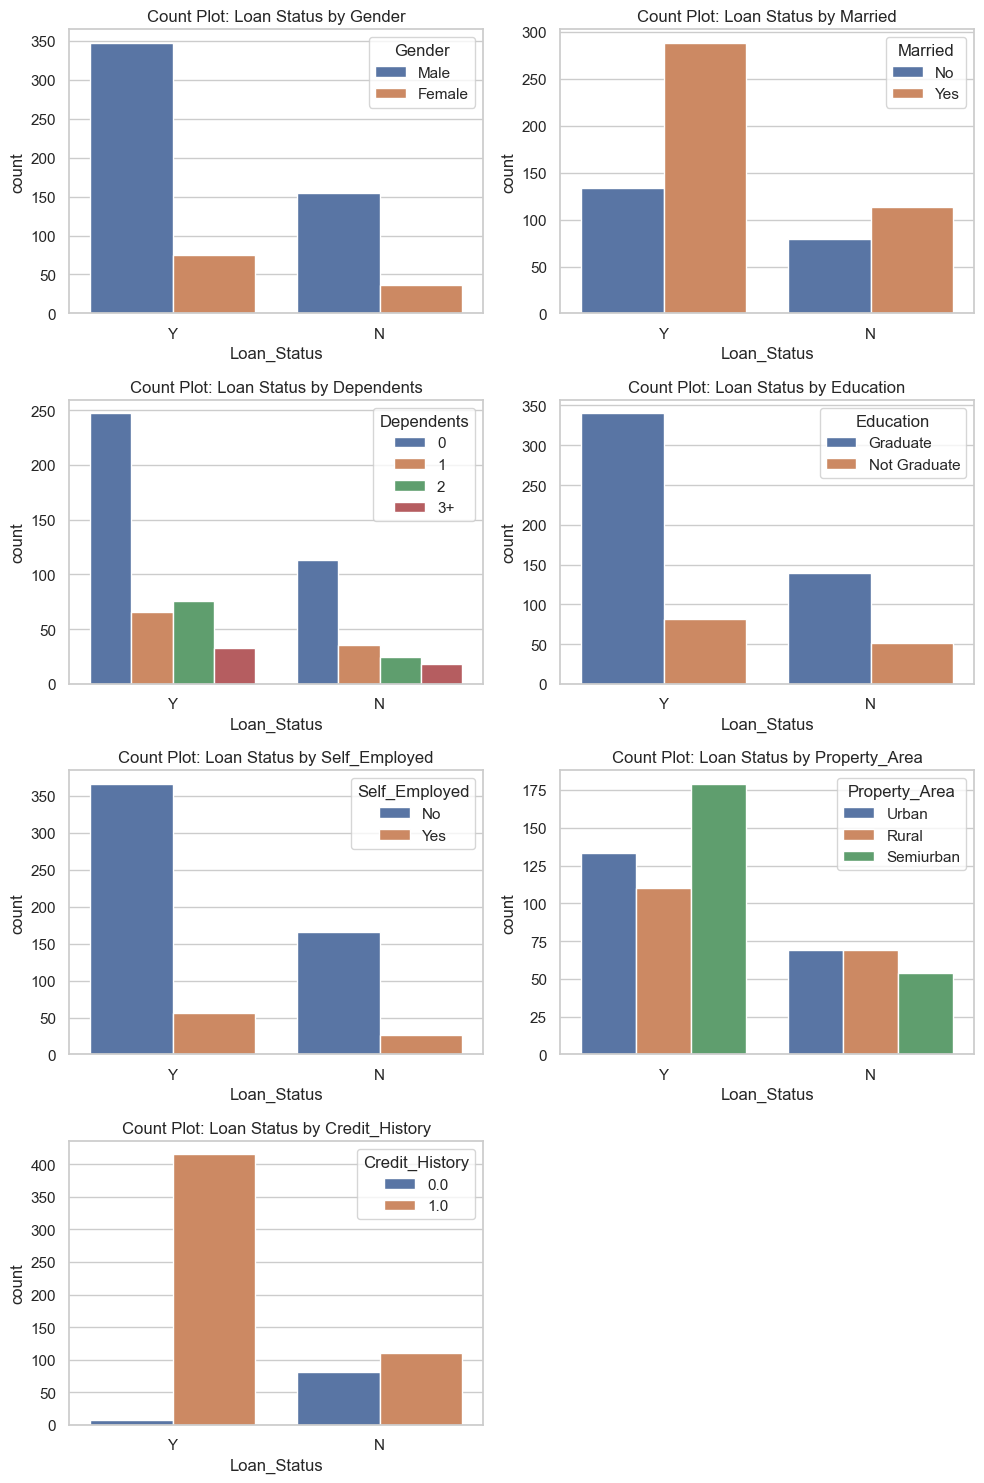

In [31]:
# Bivariate analysis using countplot
columns_to_plot = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
rows = 4
columns = 2

plt.figure(figsize = (10, 15))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(x = 'Loan_Status', hue = columns_to_plot[i], data = df)
    plt.title("Count Plot: Loan Status by " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:

#### Gender
Female: 114 applicants; 77 approved (Y), 37 not approved (N).

Male: 489 applicants; 339 approved (Y), 150 not approved (N).

Loan approval status doesn't show a significant gender bias, as both males and females have a similar proportion of approvals.

#### Married
Not Married: 213 applicants; 134 approved (Y), 79 not approved (N).

Married: 398 applicants; 286 approved (Y), 112 not approved (N).

Being married appears to increase the likelihood of loan approval, as a higher percentage of married individuals received loan approvals.

#### Dependents
0 Dependents: 345 applicants; 237 approved (Y), 108 not approved (N).

1 Dependent: 102 applicants; 66 approved (Y), 36 not approved (N).

2 Dependents: 101 applicants; 76 approved (Y), 25 not approved (N).

3+ Dependents: 51 applicants; 33 approved (Y), 18 not approved (N).

Applicants with 2 dependents have the highest likelihood of loan approval, while those with 0 or 3+ dependents have lower approval rates.

#### Education
Graduate: 480 applicants; 340 approved (Y), 140 not approved (N).

Not Graduate: 134 applicants; 82 approved (Y), 52 not approved (N).

Being a graduate is associated with a higher likelihood of loan approval, as a higher percentage of graduates received loan approvals.

#### Self_Employed
Not Self-Employed: 500 applicants; 343 approved (Y), 157 not approved (N).

Self-Employed: 82 applicants; 55 approved (Y), 27 not approved (N).

Self-employment status does not significantly impact loan approval, as both categories have similar proportions of approvals.

#### Property_Area
Rural: 179 applicants; 110 approved (Y), 69 not approved (N).

Semiurban: 233 applicants; 179 approved (Y), 54 not approved (N).

Urban: 202 applicants; 133 approved (Y), 69 not approved (N).

Applicants from semiurban areas have the highest likelihood of loan approval, while those from rural areas have the lowest approval rate.

#### Credit_History
Credit History 0.0: 89 applicants; 7 approved (Y), 82 not approved (N).

Credit History 1.0: 525 applicants; 428 approved (Y), 97 not approved (N).

Credit history is a significant determinant of loan approval, as applicants with a credit history of 1.0 (good credit) have a much higher approval rate compared to those with a credit history of 0.0 (poor credit).

### Pair Plot

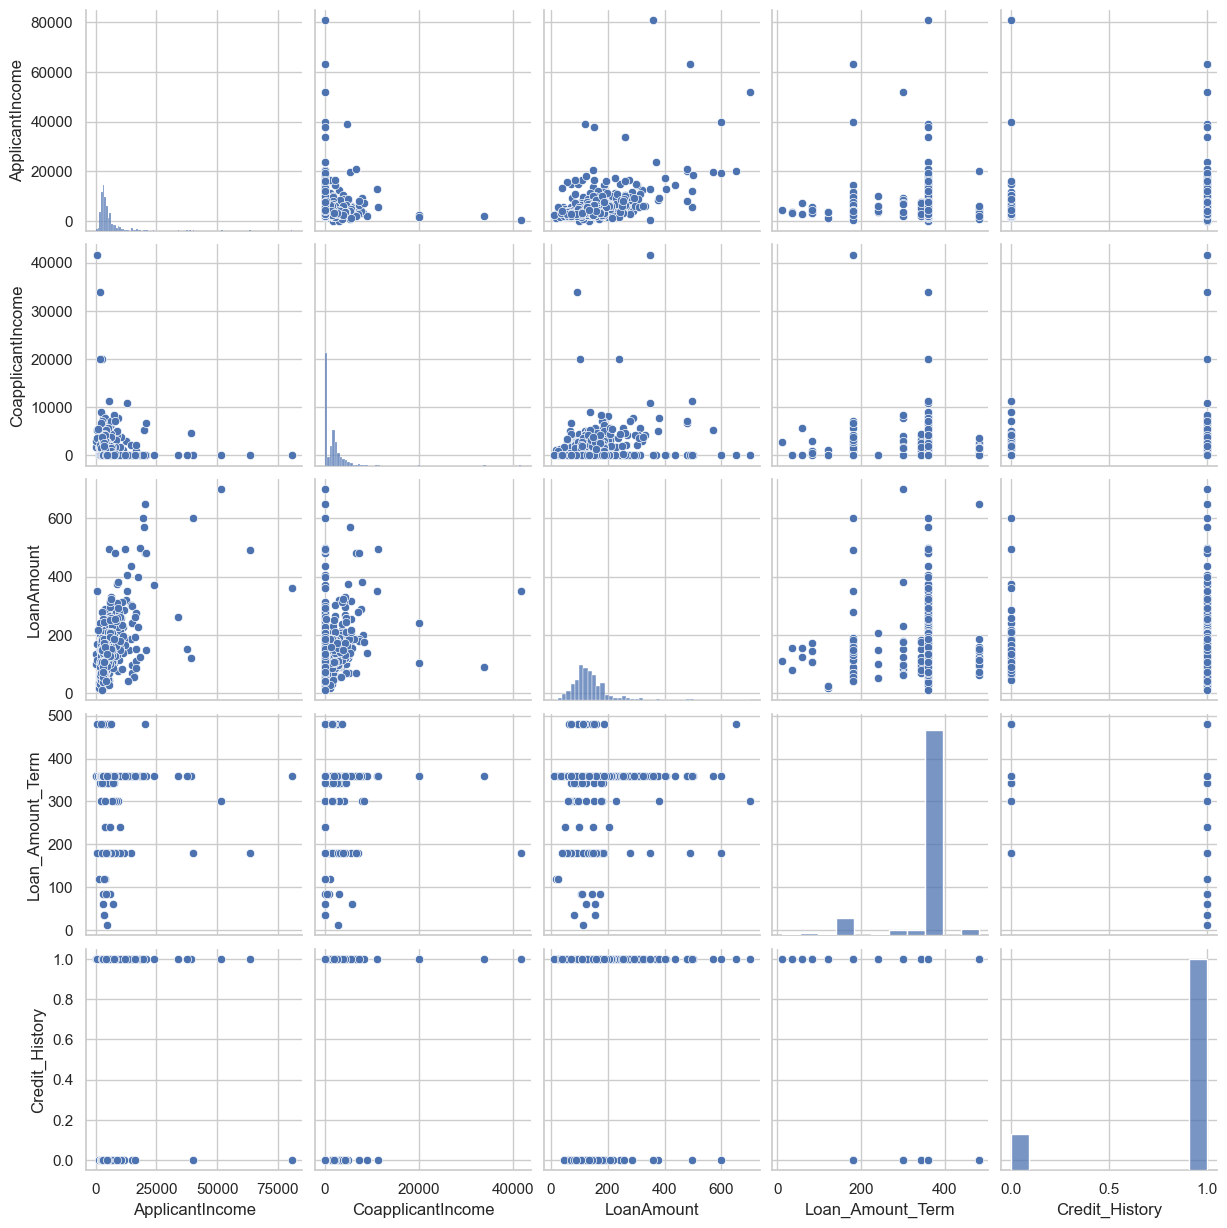

In [32]:
# Bivariate analysis using pairplot
columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

sns.pairplot(df[columns_to_plot])
plt.show()

### Observations: 

#### ApplicantIncome vs. CoapplicantIncome
In the pair plot, there is a weak negative trend between ApplicantIncome and CoapplicantIncome. On average, when one applicant's income is higher, the coapplicant's income tends to be lower.

#### ApplicantIncome vs. LoanAmount
The pair plot shows a moderate positive relationship between ApplicantIncome and LoanAmount. Higher incomes are associated with higher loan amounts.

#### ApplicantIncome vs. Loan_Amount_Term
There is no strong trend in the pair plot, indicating little to no relationship between ApplicantIncome and Loan_Amount_Term.

#### ApplicantIncome vs. Credit_History
In the pair plot, there is virtually no relationship between ApplicantIncome and Credit_History.

#### CoapplicantIncome vs. LoanAmount
A weak positive correlation is observed in the pair plot, indicating that higher coapplicant incomes are associated with higher loan amounts.

#### CoapplicantIncome vs. Loan_Amount_Term
The pair plot suggests no significant relationship between CoapplicantIncome and Loan_Amount_Term.

#### CoapplicantIncome vs. Credit_History
The pair plot shows almost no relationship between CoapplicantIncome and Credit_History.

#### LoanAmount vs. Loan_Amount_Term
There is virtually no relationship in the pair plot between LoanAmount and Loan_Amount_Term.

#### LoanAmount vs. Credit_History
In the pair plot, there is almost no relationship between LoanAmount and Credit_History.

#### Loan_Amount_Term vs. Credit_History
The pair plot suggests a very weak positive correlation between Loan_Amount_Term and Credit_History.

## Multivariate Analysis 

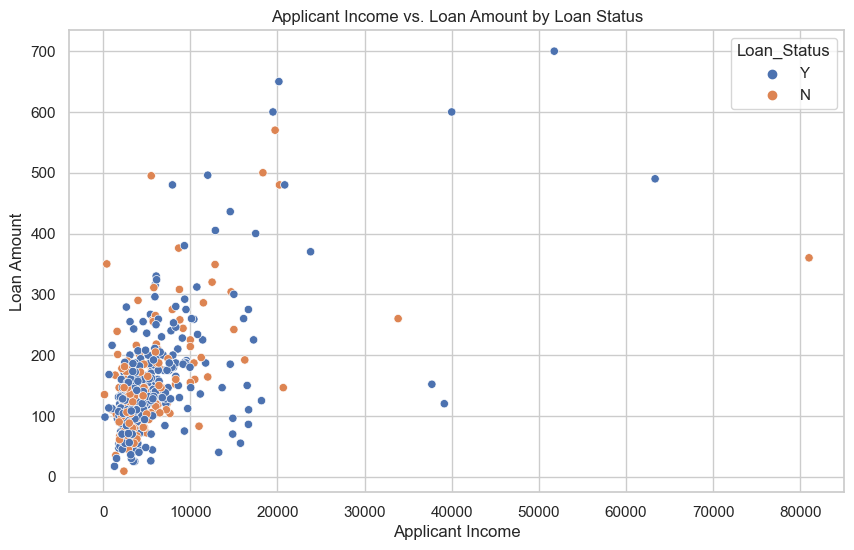

In [33]:
# Scatter plot for Applicant Income vs. Loan Amount colored by Loan Status
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "ApplicantIncome", y = "LoanAmount", hue = "Loan_Status", data = df)
plt.xlabel("Applicant Income")

plt.ylabel("Loan Amount")
plt.title("Applicant Income vs. Loan Amount by Loan Status")
plt.show()

### Observations:
The scatterplot of 'ApplicantIncome' vs. 'LoanAmount' colored by 'Loan_Status' reveals no clear, direct relationship between income, loan amount, and loan approval. Both approved and not approved loans have diverse income and loan amount ranges, with some overlap between the two groups.

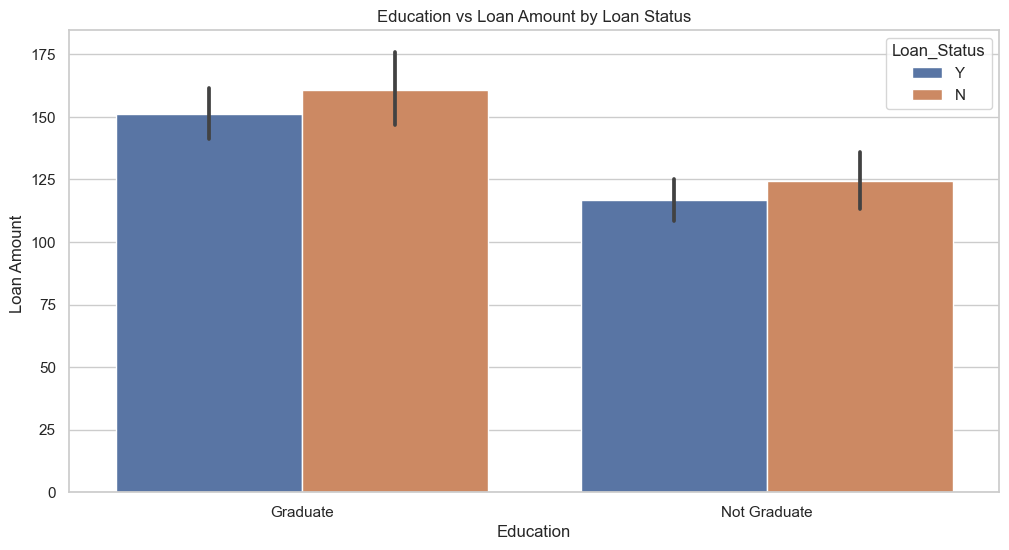

In [34]:
# Bar plot for Property Area, Loan Amount, and Loan Status
plt.figure(figsize=(12, 6))
sns.barplot(x = "Education",  y = "LoanAmount", hue = "Loan_Status", data = df)
plt.xlabel("Education")
plt.ylabel("Loan Amount ")
plt.title("Education vs Loan Amount by Loan Status")
plt.show()

### Observations:

The bar graph comparing 'Education' vs 'Loan Amount' by 'Loan Status' shows that, on average, applicants who were not approved tended to have higher mean loan amounts, regardless of their education level. This suggests that factors beyond education level and mean loan amount influence loan approval decisions.

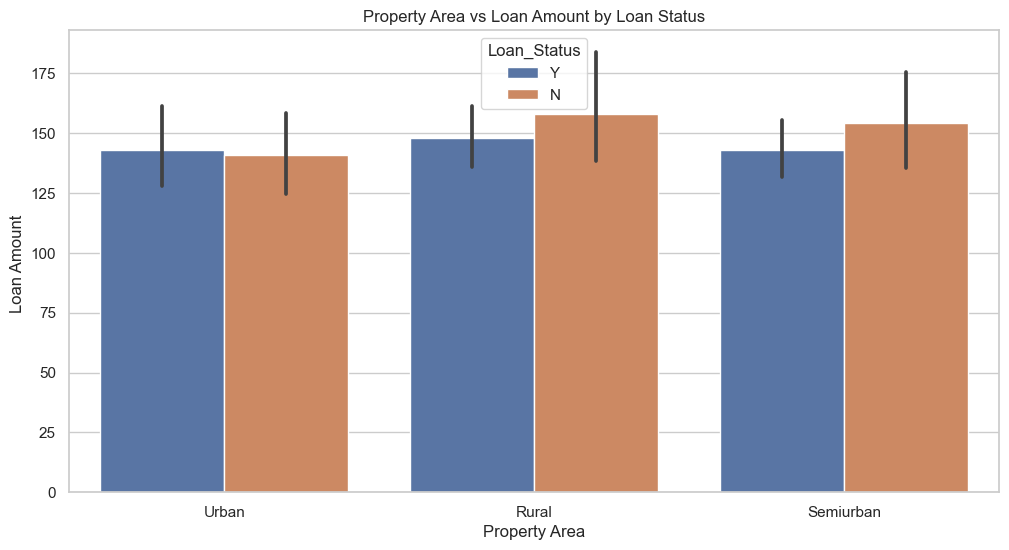

In [35]:
# Bar plot for Property Area, Loan Amount, and Loan Status
plt.figure(figsize=(12, 6))
sns.barplot(x = "Property_Area",  y = "LoanAmount", hue = "Loan_Status", data = df)
plt.xlabel("Property Area")
plt.ylabel("Loan Amount ")
plt.title("Property Area vs Loan Amount by Loan Status")
plt.show()

### Observations:
The bar graph comparing 'Property Area' vs. 'Loan Amount' by 'Loan Status' reveals that, on average, applicants who were not approved tended to have slightly higher mean loan amounts across different property areas, including Rural, Semiurban, and Urban. This suggests that while property area may play a role, it is not the sole determinant of loan approval decisions.

<Figure size 1000x600 with 0 Axes>

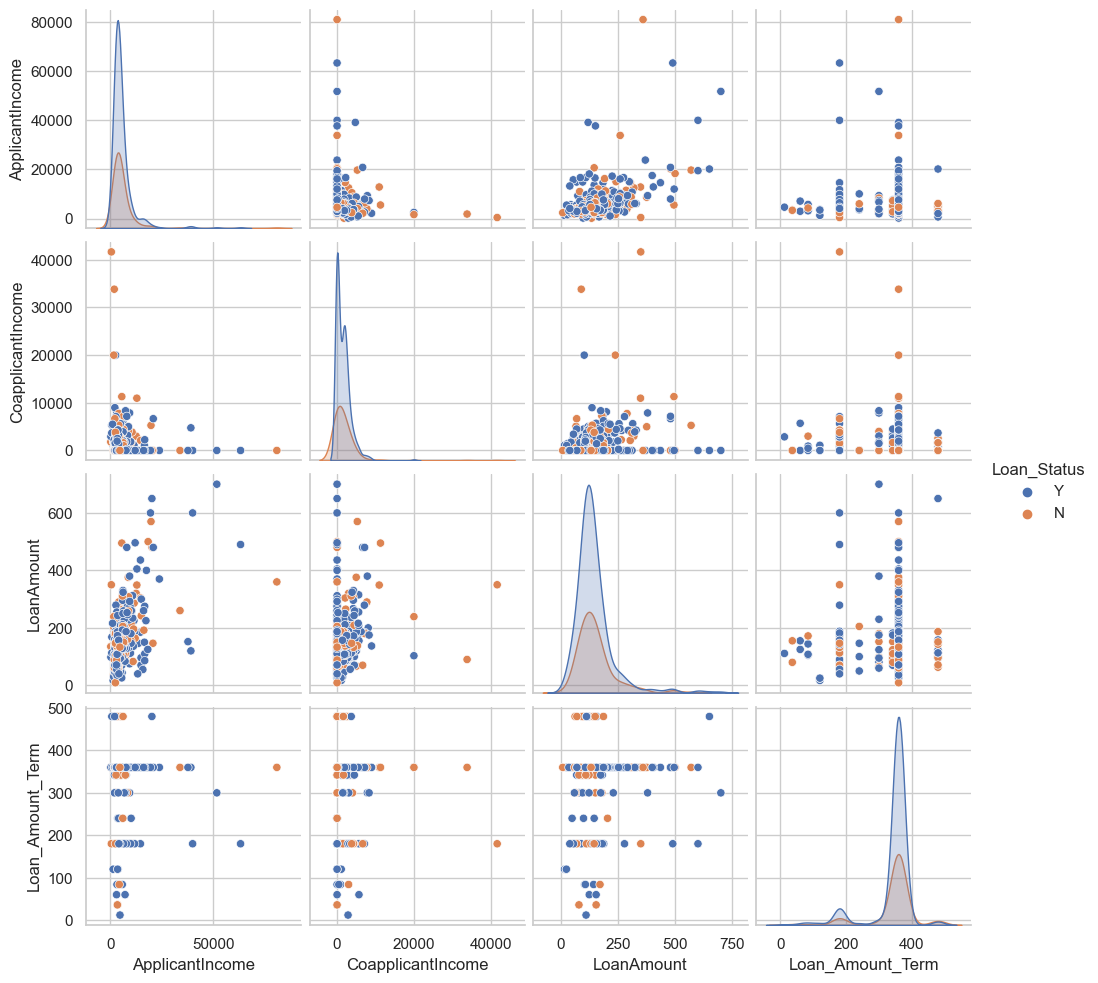

In [36]:
# Pair plot for Applicant Income, CoapplicantIncome, and Loan Amount
plt.figure(figsize = (10, 6))
sns.pairplot(data = df, vars=["ApplicantIncome", "CoapplicantIncome", "LoanAmount", 'Loan_Amount_Term'], hue = "Loan_Status")
plt.show()

### Observations:

#### Applicant Income vs. Loan Amount by Loan Status
Higher applicant incomes tend to be associated with higher loan amounts for "Approved (Y)" loans. The relationship is less clear for "Not Approved (N)" loans, with overlap between the two groups.

#### Coapplicant Income vs. Loan Amount by Loan Status
There is no clear relationship between coapplicant income and loan amount for either loan approval status. Scatter points are scattered without forming a pattern.

#### Loan Amount vs. Loan Amount Term by Loan Status
Loan term does not significantly influence loan amounts for both "Approved (Y)" and "Not Approved (N)" loans. Most data points cluster within specific loan amount ranges, regardless of term.

#### Applicant Income vs. Loan Amount Term by Loan Status
There is no clear relationship between applicant income, loan term, and loan approval status. Scatter points do not show distinct patterns based on loan term or approval status.

# Data Preprocessing

The "Loan_ID" column doesn't provide any valuable information for predictions because it contains unique identifiers without any meaningful data.

In [37]:
# Dropping the 'Loan_ID' column
df.drop('Loan_ID', axis = 1, inplace = True)

In the 'Dependents' column, there are values like '3+' which indicate three or more dependents. To make data more consistent and numerical, it is necessary to replace '3+' with '3' which will indicate 3 or more than 3 dependents. This transformation is important for preparing data for various tasks like data analysis and machine learning, which require numerical representations of categorical data.

In [38]:
# Relacing 3+ 'in Dependents' columns with 3
df['Dependents'] = df['Dependents'].str.replace('3\+', '3')

## Label Encoding

Columns such as 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', and 'Loan_Status' contain categorical data, it is necessary to convert this data into numerical format.

In [39]:
# Converting the categorical columns into numerical columns

# list of columns to encode
columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']

encoder = LabelEncoder()
for i in columns_to_encode:
    df[i] = encoder.fit_transform(df[i])

#### Target variable 'Loan_Status' has been encoded as follows: 0 for 'No' (loan not approved) and 1 for 'Yes' (loan approved).

In [40]:
# Display the dataset after updation
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


## Checking for the outliers

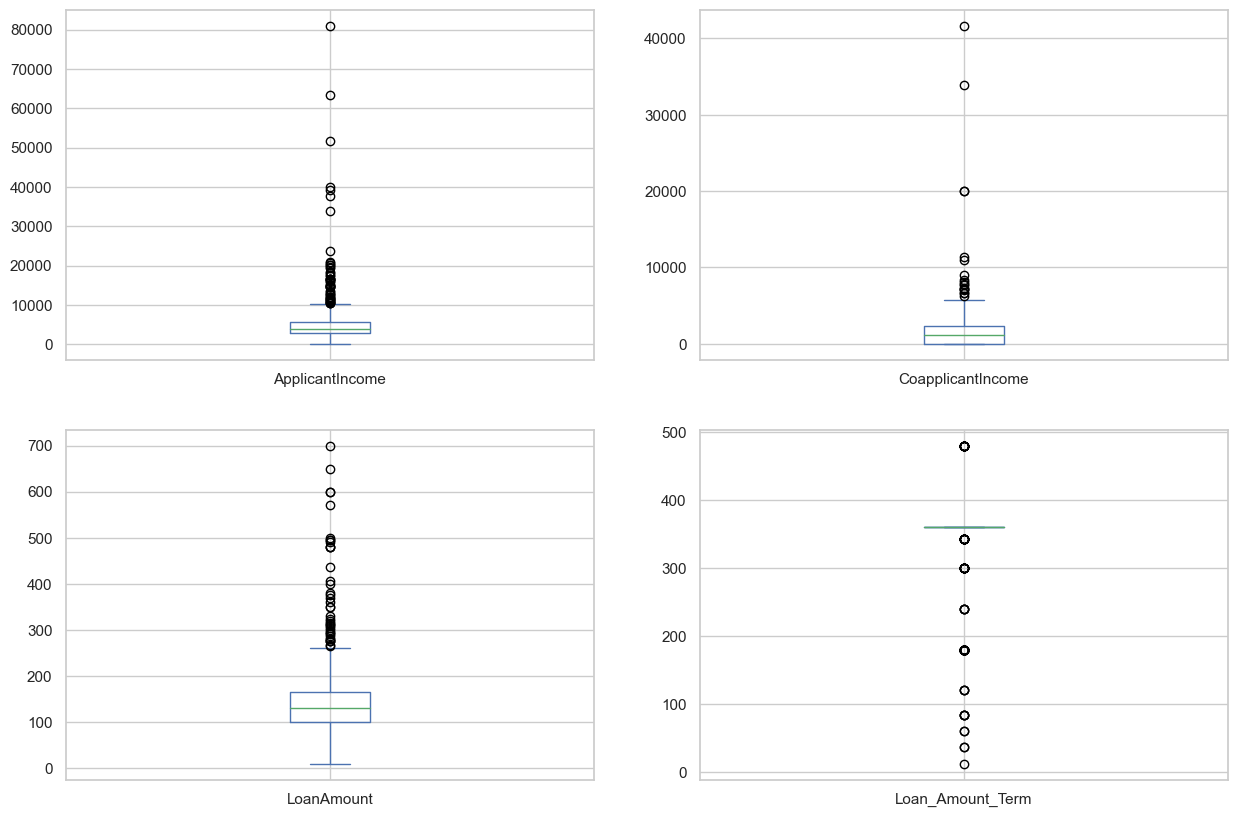

In [41]:
# Checking for the outliers using boxplot in numerical columns
# Numerical columns include 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', and 'Loan_Amount_Term'columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[numerical_columns].plot(kind = 'box', subplots = True, figsize = (15, 10), layout = (2, 2))
plt.show()

Outliers are present in 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History' columns.

In [42]:
# List of columns containing outliers
columns_with_outliers = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] 

In [43]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df[columns_with_outliers]))
z_score

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.000000,0.279851
1,0.134412,0.038732,0.219273,0.279851
2,0.393747,0.554487,0.957641,0.279851
3,0.462062,0.251980,0.314547,0.279851
4,0.097728,0.554487,0.064454,0.279851
...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851
610,0.212557,0.554487,1.267279,2.518655
611,0.437174,0.472404,1.269371,0.279851
612,0.357064,0.554487,0.483367,0.279851


In [44]:
# Identify the indices where the z-score is greater than 3
np.where(z_score > 3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [45]:
# Removing Outliers
z = 3
updated_df = df[(z_score < z).all(axis = 1)]
updated_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1


In [46]:
# Checking the shape of dataframe after removing the outliers
updated_df.shape

(577, 12)

## Checking for the skewness

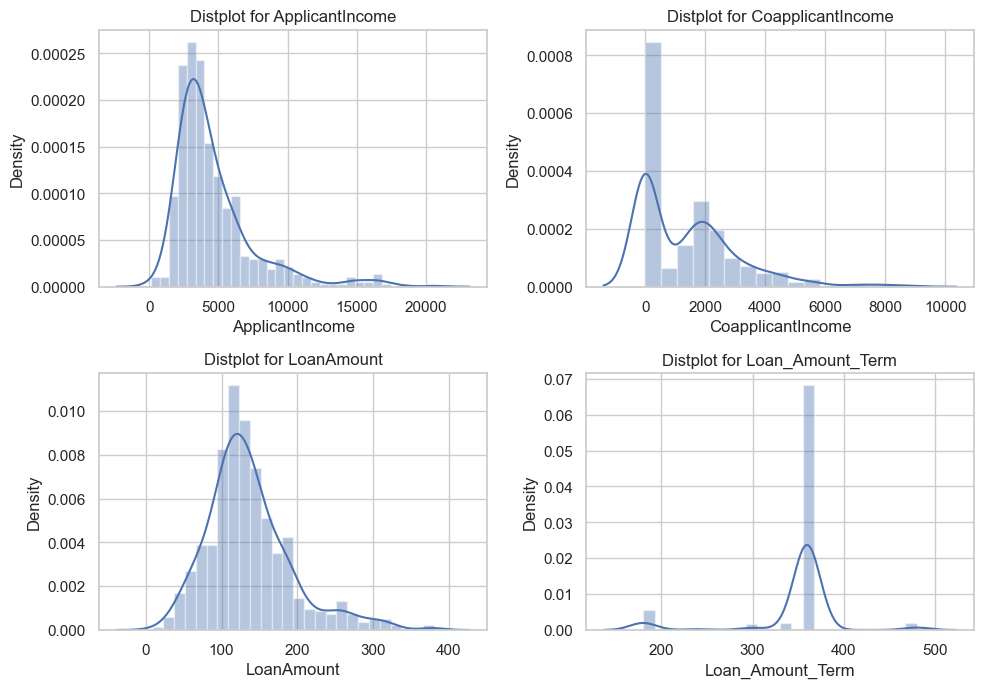

In [47]:
# Checking for the skewness using Distplot in numerical columns
# Numerical columns include 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History' columns
ncol = 2
nrow = 3
plt.figure(figsize = (10, 10))

for i in range(0, len(numerical_columns)):
    plt.subplot(nrow, ncol, i+1)
    sns.distplot(updated_df[numerical_columns[i]]) 
    plt.title("Distplot for " + numerical_columns[i]) 
    plt.tight_layout()

plt.show()

#### Observations:

'ApplicantIncome' exhibits a positive skewness, suggesting that the right tail of its distribution is longer, indicating higher income values are less common.

'CoapplicantIncome' also has positive skewness, implying that the majority of coapplicant income values are lower, with a longer tail on the higher-income side.

'LoanAmount' shows positive skewness, indicating that most loan amounts tend to be lower, with some larger outliers.

'Loan_Amount_Term' displays negative skewness, suggesting that shorter-term loans are more common, with a few longer-term loans.

In [48]:
# Checking for the skewness using skew() method
updated_df[numerical_columns].skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
dtype: float64

'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount' have positive skewness, suggesting that most values are on the lower side.
'Loan_Amount_Term' and 'Credit_History' have negative skewness, indicating that most values are concentrated on one side (longer terms or good credit history) with some values on the other side.

In [49]:
# List of the columns to be transformed
columns_to_transform = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Copying data
updated_df2 = updated_df.copy()

# Reduing skewnees using yeojohnson transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df[column] + 1)
    updated_df2[column] = transformed_data

In [50]:
# Again checking for the skewness after applying transformation
updated_df2[columns_to_transform].skew()

ApplicantIncome      0.027569
CoapplicantIncome   -0.181744
LoanAmount           0.045064
Loan_Amount_Term     0.718390
dtype: float64

Skewness in every column has been reduced, indicating a more balanced and symmetric distribution of data in each column.

In [51]:
updated_df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,11.158084,0.712868,12.878106,1.555134e+07,1,2,1
1,1,1,1,0,0,10.765112,9.973539,12.192505,1.555134e+07,1,0,0
2,1,1,0,0,1,10.095116,0.712868,9.241837,1.555134e+07,1,2,1
3,1,1,0,1,0,9.862281,10.793603,11.874342,1.555134e+07,1,2,1
4,1,0,0,0,0,11.199460,0.712868,12.682764,1.555134e+07,1,2,1


## Correlation Coefficient Matrix

In [52]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df2.corr()
correlation_coefficient

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.045696,-0.006207,0.058601,0.234208,0.173069,-0.097639,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.024817,-0.015779,-0.024786,0.334356,0.182063,-0.128208,0.019308,0.010595,0.089026
Education,0.045696,0.024817,1.000000,-0.007139,-0.176076,0.048100,-0.126464,-0.067929,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,-0.007139,1.000000,0.212238,-0.086559,0.117512,-0.052339,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058601,-0.024786,-0.176076,0.212238,1.000000,-0.359934,0.433989,-0.088065,0.028825,-0.011378,-0.002489
CoapplicantIncome,0.234208,0.334356,0.048100,-0.086559,-0.359934,1.000000,0.199315,-0.003410,0.005962,-0.075072,0.078483
LoanAmount,0.173069,0.182063,-0.126464,0.117512,0.433989,0.199315,1.000000,0.022201,-0.004359,-0.094263,-0.029026
Loan_Amount_Term,-0.097639,-0.128208,-0.067929,-0.052339,-0.088065,-0.003410,0.022201,1.000000,0.008533,-0.032707,-0.053447
Credit_History,0.013172,0.019308,-0.075217,-0.016390,0.028825,0.005962,-0.004359,0.008533,1.000000,-0.008121,0.560936
Property_Area,-0.026340,0.010595,-0.068596,-0.028253,-0.011378,-0.075072,-0.094263,-0.032707,-0.008121,1.000000,0.026507


Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

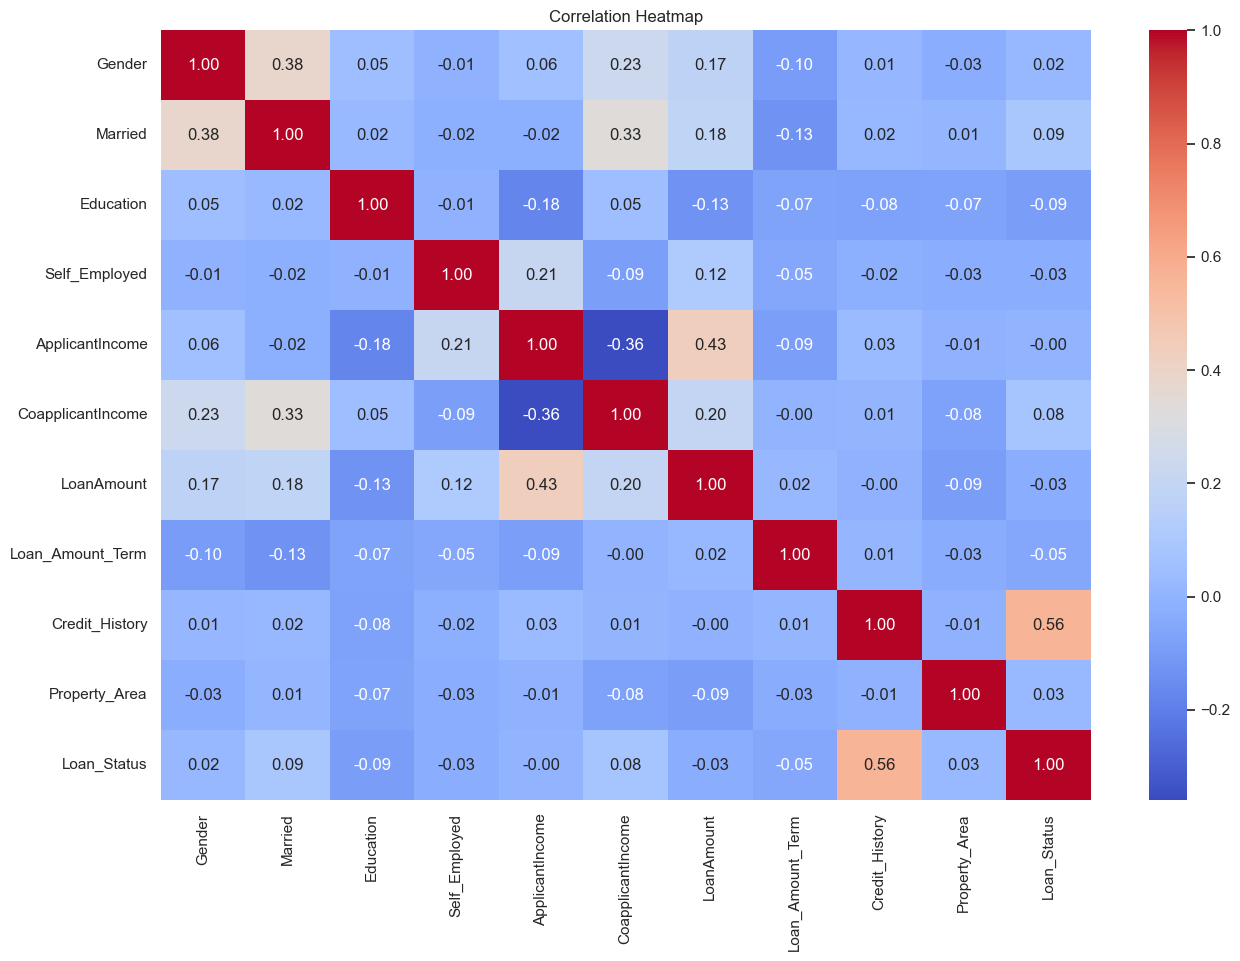

In [53]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:

#### Gender
The positive correlation coefficient (0.379) between 'Gender' and 'Married' suggests a statistical tendency for individuals who are married to be somewhat more common among those with a specific gender within the dataset.

#### Married
Being 'Married' has a positive correlation (0.335) with 'CoapplicantIncome,' indicating that married individuals tend to have higher coapplicant incomes.

#### Education
'Education' is negatively correlated (-0.176) with 'ApplicantIncome,' implying that individuals with higher education levels tend to have lower applicant incomes.

#### Self_Employed
'Self_Employed' has a positive correlation (0.212) with 'ApplicantIncome,' indicating that self-employed individuals tend to have higher applicant incomes.

#### ApplicantIncome
'ApplicantIncome' has a strong positive correlation (0.434) with 'LoanAmount,' suggesting that higher applicant incomes are associated with higher loan amounts.

#### CoapplicantIncome
There is a weak positive correlation (0.199) between 'CoapplicantIncome' and 'LoanAmount,' indicating a slight tendency for higher coapplicant incomes to be associated with higher loan amounts.

#### LoanAmount
'LoanAmount' has a weak positive correlation (0.022) with 'Loan_Amount_Term,' suggesting that loan term has a limited influence on loan amounts.

#### Loan_Amount_Term
'Loan_Amount_Term' is positively correlated (0.009) with 'Credit_History,' indicating a very subtle relationship between loan term and credit history.

#### Credit_History
'Credit_History' has a strong positive correlation (0.561) with 'Loan_Status,' indicating that a good credit history is highly associated with loan approval.

#### Property_Area
There is a very weak positive correlation (0.027) between 'Property_Area' and 'Loan_Status,' suggesting a minimal relationship between property area and loan approval.

#### Loan_Status
'Loan_Status' is positively correlated (0.089) with 'Married,' indicating that married individuals may have a slightly higher likelihood of loan approval.

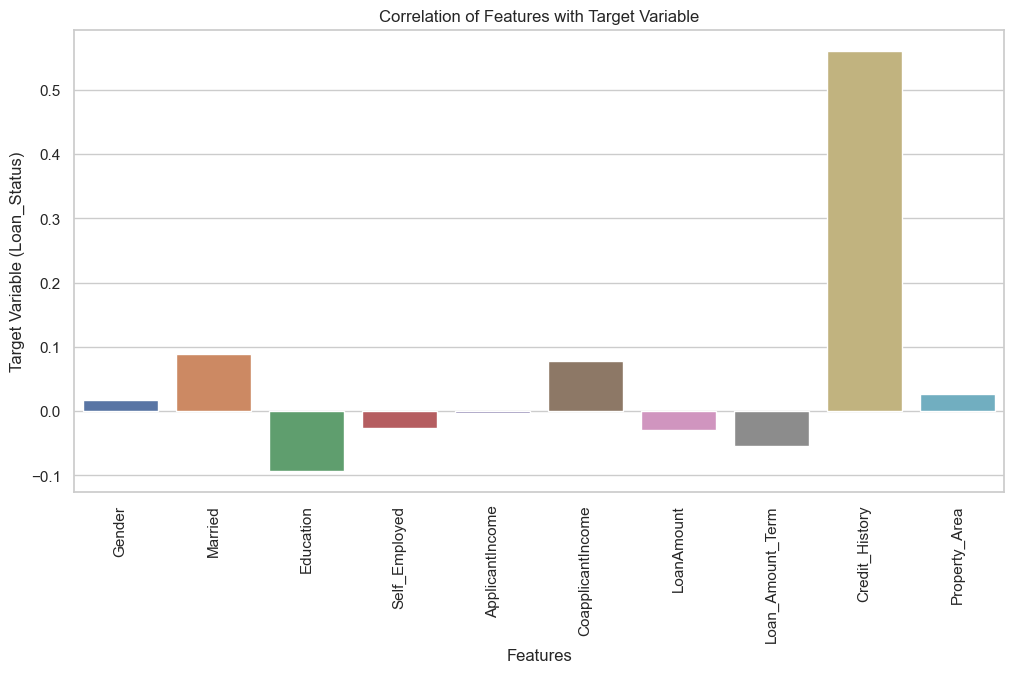

In [54]:
# Checking for the correlation between features and target variable separately
target = 'Loan_Status'

correlation_matrix = updated_df2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (Loan_Status)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation = 90)

plt.show()

### Observations:

#### Gender
The correlation between 'Gender' and 'Loan_Status' is 0.0174, indicating a very weak positive correlation. Gender has a minimal influence on loan approval.

#### Married
'Married' has a correlation of 0.0890 with 'Loan_Status,' suggesting a weak positive correlation. Being married may slightly increase the likelihood of loan approval.

#### Education
'Education' is negatively correlated with 'Loan_Status' (-0.0927). Having a higher level of education is associated with a slightly lower likelihood of loan approval.

#### Self-Employed
'Self-Employed' has a weak negative correlation (-0.0265) with 'Loan_Status.' Self-employed individuals may have a slightly lower likelihood of loan approval.

#### Applicant Income
'ApplicantIncome' is weakly correlated (-0.0025) with 'Loan_Status,' suggesting that there is minimal influence of applicant income on loan approval.

#### Coapplicant Income
'CoapplicantIncome' has a positive correlation (0.0785) with 'Loan_Status.' A higher coapplicant income may slightly increase the likelihood of loan approval.

#### Loan Amount
'LoanAmount' is weakly negatively correlated (-0.0290) with 'Loan_Status.' Loan amount has a minimal influence on loan approval.

#### Loan Amount Term
'Loan_Amount_Term' has a weak negative correlation (-0.0534) with 'Loan_Status.' The term of the loan has a limited influence on loan approval.

#### Credit History
'Credit_History' has a strong positive correlation (0.5609) with 'Loan_Status.' A good credit history significantly increases the likelihood of loan approval.

#### Property Area
'Property_Area' has a very weak positive correlation (0.0265) with 'Loan_Status.' Property area has minimal influence on loan approval.

# Feature Engineering

In [55]:
# Extracting features and target from the dataset
features = updated_df2.drop(columns = 'Loan_Status')
target = updated_df2['Loan_Status']

## Feature Scaling

In [56]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [57]:
# Creating a DataFrame 'updated_features' to store the scaled data using 'scaled_df'
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681913,-1.120264,0.316821,0.142606,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234917,0.731871,-0.015281,0.142606,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527186,-1.120264,-1.444570,0.142606,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.792031,0.895884,-0.169397,0.142606,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728977,-1.120264,0.222198,0.142606,0.418513,1.227472


## Checking for the Variance Inflation Factor

In [58]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

             Features       VIF
0              Gender  1.221516
1             Married  1.416976
2          Dependents  1.168204
3           Education  1.066717
4       Self_Employed  1.053471
5     ApplicantIncome  1.765861
6   CoapplicantIncome  1.585978
7          LoanAmount  1.551892
8    Loan_Amount_Term  1.048304
9      Credit_History  1.008997
10      Property_Area  1.023091


The VIF values for all the features fall within a certain range.

In [59]:
# Storing the features and target variables in X1 and y1
X1 = updated_features
y1 = target

## Checking for the Class Imbalance problem

In [60]:
# Checking for the class imbalance problem
y1.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Class imbalance problem is present in the dataset.

In [61]:
# Fixing class imbalance problem using oversampling method
sm = SMOTE()
X, y = sm.fit_resample(X1, y1)

In [62]:
# Again checking the values after applying oversampling method
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Now all the classes are balanced.

## Finding the best random state

In [63]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_accuracy_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
        rfc = RandomForestClassifier()
        rfc.fit(X_train, y_train)
        pred = rfc.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        
        if accuracy > max_accuracy_score:
            max_accuracy_score = accuracy
            max_random_state = i 
    
    return max_accuracy_score, max_random_state

# Calling the function to find the best random state
best_accuracy_score, best_random_state = find_best_random_state(X, y)

print("Best Accuracy score is", best_accuracy_score, "at random state", best_random_state)

Best Accuracy score is 0.90625 at random state 150


## Spliting dataset into training and testing sets

In [64]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = best_random_state)

## Different Models for predicting Applicant Loan Approval Status

In [65]:
# List of names of the models
models_name = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 
               'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 
               'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier']

In [66]:
# List of machine learning models
models = [
    LogisticRegression(),             # Logistic Regression
    KNeighborsClassifier(),           # k-Nearest Neighbors
    GaussianNB(),                     # Gaussian Naive Bayes
    SVC(),                            # Support Vector Classifier
    DecisionTreeClassifier(),         # Decision Tree Classifier
    RandomForestClassifier(),         # Random Forest Classifier
    ExtraTreesClassifier(),           # Extra Trees Classifier
    GradientBoostingClassifier(),     # Gradient Boosting Classifier
    AdaBoostClassifier(),             # AdaBoost Classifier
    BaggingClassifier(),              # Bagging Classifier
    xgb.XGBClassifier()               # XGBoost Classifier
]

In [67]:
models_accuracy_score = []  # List for storing accuracy score of different models
i = 0
for model in models:
    print(models_name[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    models_accuracy_score.append(accuracy)
    print("Accuracy score:", accuracy)
    print("Classifiction report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print('\n\n')
    i += 1

Logistic Regression
Accuracy score: 76.875
Classifiction report:
               precision    recall  f1-score   support

           0       0.86      0.63      0.73        79
           1       0.72      0.90      0.80        81

    accuracy                           0.77       160
   macro avg       0.79      0.77      0.76       160
weighted avg       0.79      0.77      0.76       160

Confusion matrix:
 [[50 29]
 [ 8 73]]



K-Nearest Neighbors
Accuracy score: 82.5
Classifiction report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        79
           1       0.88      0.75      0.81        81

    accuracy                           0.82       160
   macro avg       0.83      0.83      0.82       160
weighted avg       0.83      0.82      0.82       160

Confusion matrix:
 [[71  8]
 [20 61]]



Gaussian Naive Bayes
Accuracy score: 78.125
Classifiction report:
               precision    recall  f1-score   support

           0

Logistic Regression: Accuracy score of 76.88%, indicating decent performance. Balanced precision and recall for both classes.

K-Nearest Neighbors (KNN): Accuracy score of 82.5%. High precision for class 0 (78%) and moderate precision for class 1 (88%). Moderate recall for both classes.

Gaussian Naive Bayes: Accuracy score of 78.13%. Balanced precision and recall for both classes, but lower precision for class 0 (71%).

Support Vector Classifier (SVC): Accuracy score of 79.38%. Impressive precision and recall for both classes. Higher precision for class 0 (81%) and class 1 (83%).

Decision Tree Classifier: Accuracy score of 82.5%. Balanced precision and recall values for both classes.

Random Forest Classifier: Accuracy score of 90.63%. Exceptionally strong precision and recall for both classes.

Extra Trees Classifier: Accuracy score of 91.25%. Exhibits high accuracy and maintains a strong balance between precision and recall for both classes.

Gradient Boosting Classifier: Accuracy score of 83.75%. Demonstrates solid overall performance with balanced precision and recall values.

AdaBoost Classifier: Accuracy score of 78.75%. Shows balanced precision and recall values for both classes.

Bagging Classifier: Accuracy score of 80.63%. Strong performance, especially for class 0.

XGBoost Classifier: Accuracy score of 85.0%. Balanced precision and recall values for both classes.

## Cross Validation

In [68]:
i = 0
diff_acc_cv = []  # List for storing the difference of the accuracy score and mean of cross validaion scores of each model
for model in models:
    print(models_name[i])
    print("Accuracy Score:", models_accuracy_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_accuracy_score[i] - cv_score.mean()*100
    print("Difference between Accuracy Score and Cross Validation Score:", diff)
    diff_acc_cv.append(diff)
    print('\n')
    i += 1

Logistic Regression
Accuracy Score: 76.875
Cross Validation Scores: [69.375      74.21383648 76.72955975 71.69811321 71.69811321]
Mean of Cross Validation Scores: 72.74292452830188
Difference between Accuracy Score and Cross Validation Score: 4.132075471698116


K-Nearest Neighbors
Accuracy Score: 82.5
Cross Validation Scores: [70.625      74.21383648 76.10062893 71.69811321 81.13207547]
Mean of Cross Validation Scores: 74.75393081761005
Difference between Accuracy Score and Cross Validation Score: 7.746069182389945


Gaussian Naive Bayes
Accuracy Score: 78.125
Cross Validation Scores: [68.125      71.06918239 74.8427673  71.69811321 73.58490566]
Mean of Cross Validation Scores: 71.86399371069182
Difference between Accuracy Score and Cross Validation Score: 6.261006289308185


Support Vector Classifier
Accuracy Score: 79.375
Cross Validation Scores: [70.625      75.47169811 73.58490566 70.44025157 76.72955975]
Mean of Cross Validation Scores: 73.37028301886794
Difference between Accura

The Extra Trees Classifier achieved the highest accuracy score among the models, with an accuracy score of 91.25%. It demonstrates strong performance in fitting the training data and has a relatively small difference of 6.32% from the mean cross-validation scores, indicating both accuracy and stability. 

Random Forest Classifier: Achieved an accuracy score of 90.63% with a higher difference of 7.70% from cross-validation scores, suggesting potential overfitting.

XGBoost Classifier: Scored 85.0% accuracy with a 4.46% difference from cross-validation scores, balancing accuracy and stability.

Gradient Boosting Classifier: Attained 83.75% accuracy with a 4.71% difference, demonstrating solid overall performance.

Decision Tree Classifier: Achieved 82.5% accuracy with a 4.98% difference, demonstrating balanced performance.

K-Nearest Neighbors (KNN): Scored 82.5% accuracy with a 7.75% difference, showing room for improvement but reasonable accuracy.

Support Vector Classifier (SVC): Scored 79.38% accuracy with a 6.00% difference, showing impressive precision and recall.

Gaussian Naive Bayes: Attained 78.13% accuracy with a 6.26% difference, maintaining balanced precision and recall.

AdaBoost Classifier: Scored 78.75% accuracy with a 4.74% difference, showing balanced precision and recall values.

Logistic Regression: Achieved 76.88% accuracy with a moderate difference of 4.13%, demonstrating decent performance with consistency.

In [69]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                                   'Accurccy Score': models_accuracy_score, 
                                   'Difference: Accuracy Score & CV Score': diff_acc_cv})

In [70]:
models_performance

,Model,Accurccy Score,Difference: Accuracy Score & CV Score
0,Logistic Regression,76.875,4.132075
1,K-Nearest Neighbors,82.500,7.746069
2,Gaussian Naive Bayes,78.125,6.261006
3,Support Vector Classifier,79.375,6.004717
4,Decision Tree Classifier,82.500,4.978774
5,Random Forest Classifier,90.625,7.698899
6,Extra Trees Classifier,91.250,6.316038
7,Gradient Boosting Classifier,83.750,4.715409
8,AdaBoost Classifier,78.750,4.742925
9,Bagging Classifier,80.625,0.343553


## Final Model
After careful evaluation, the Extra Trees Classifier stands out as the best model with an accuracy score of 91.25%, the Extra Tress Classifier exhibits strong performance in fitting the training data. Additionally, the difference between the accuracy score and the mean of cross-validation scores is minimal at 6.31%, suggesting that the model maintains stability and accuracy. This balance between accuracy and stability makes the Extra Trees Classifier a prudent choice for the final model.

## Hyper Parameter Tuning

In [71]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [10, 20, 30],        # Maximum depth of each decision tree 
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [72]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesClassifier(), param_grid = parameters_grid, cv = 5, scoring = 'accuracy')

In [73]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [74]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [75]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [76]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.8097563976377952

In [77]:
# Creating final model
final_model = ExtraTreesClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

92.5


#### Final model has given accuracy score 92.5%.

## Plotting the AUC-ROC Curve

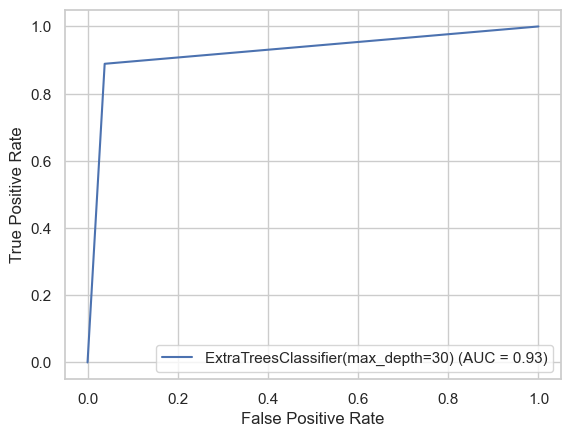

In [78]:
# Calculate the ROC curve and AUC
fpr, tpr, thresolds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a ROC curve display with relevant information
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)

# Plot the ROC curve
display.plot()
plt.show()

## Saving the final model

In [79]:
# Saving the model 
joblib.dump(final_model, "Loan_Application_Status_Prediction_Model.pkl")

['Loan_Application_Status_Prediction_Model.pkl']

In [80]:
# Loading the saved model
model = joblib.load("Loan_Application_Status_Prediction_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [81]:
# Saving the actual values
actual_values = np.array(y_test)

In [82]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

,Actual Vlaues,Predicted Values
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
155,1,1
156,0,0
157,0,0
158,1,1


Here, '0' denotes loan not approved while '1' denotes loan approved.

# Loan Application Status Prediction Project Documentation
## Project Overview


### Objective
The objective of this project is to predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.

### Data Source
The dataset used for this project is sourced from a CSV file includes details of applicants who have applied for loan. The dataset also includes details like credit history, loan amount, their income, dependents etc. 

### Data Preprocessing
#### Data Cleaning
Data cleaning was performed to handle missing values, ensuring the dataset's completeness.
Outliers, if present, were identified and addressed appropriately.

#### Feature Engineering
Relevant features were selected or created to enhance model performance.
Feature extraction and transformation techniques, such as encoding categorical variables, were applied as needed.

### Data Splitting
The dataset was divided into training and testing sets to evaluate model performance. The split is 80% for training and 20% for testing.

### Feature Scaling
Features were scaled or normalized to ensure that models are not biased by variables with larger scales.

### Models Employed
Several machine learning models were employed to predict applicant loan status approval, including:
'Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier'.

Each model mentioned above was trained on the training dataset.

### Model Evaluation and Hyperparameter Tuning

#### Model Evaluation Metrics
The following evaluation metrics were used to assess model performance:

Accuracy: Measures the proportion of correctly classified loan approval classes.

Precision: Evaluates the model's ability to correctly predict loan approval.

Recall: Measures the model's ability to identify all actual loan approval cases.

F1-Score: Combines precision and recall to provide a balanced measure of model performance.

Area Under the Receiver Operating Characteristic Curve (AUC-ROC): Assesses the model's ability to distinguish between applicant's loan approved and loan not approved cases.

#### Model Comparison
The performance of each model was compared based on the evaluation metrics mentioned above. Visual representations, such as confusion matrices or ROC curves, were used to aid in model selection.

#### Hyperparameter Tuning
Hyperparameter tuning techniques, such as grid search, was employed to optimize model performance.

### Results
#### Final Model Selection
After careful evaluation, the Extra Trees Classifier model was selected as the final model for predicting applicant loan approval status due to its superior performance.

### Key Findings
Credit History Rules: Applicants with a strong credit history are more likely to have their loans approved.

Income Matters: Higher income levels increase the chances of loan approval.

Debt Management Matters: Managing and reducing existing debts can improve an applicant's chances of loan approval.

Marital Status Influence: Being married is moderately associated with higher loan approval rates.

Loan Amount and Approval: While not strongly correlated, larger loan amounts tend to have slightly higher approval rates.

Gender Impact: Gender has a minimal effect on loan approval in this dataset.

Education Influence: Surprisingly, having a higher level of education is associated with slightly lower loan approval rates.

Loan Term Consideration: Longer loan terms are correlated with lower approval rates.

Self-Employment Factor: Being self-employed has a minor negative influence on loan approval.

Property Area Variations: The location of the property plays a minor role in loan approval decisions.

### Conclusion
In conclusion, the Loan Approval Prediction Project has provided valuable insights into the factors influencing loan approval status. By analyzing applicant data and uncovering key insights. These insights can be leveraged to make more informed lending decisions, improve approval rates, and enhance the overall efficiency of the loan approval process. This project serves as a foundation for developing predictive models that can assist lending institutions in optimizing their loan approval strategies, ultimately benefiting both applicants and lenders.